## Importing all the required libraries

Here  we have just loaded, read and extracted year from enrollment date in the loyalty history dataset and we have also loaded customer flight activity dataset  


- `pandas`: Used for data manipulation and analysis.
- `matplotlib.pyplot`: Enables data visualization and plotting.
- `seaborn` : Seaborn simplifies creating beautiful, statistical data visualizations.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the loyalty history dataset
loyalty_history_path = '/Users/rishipatel/Desktop/Sem-5/DV/Ass-3/Updated_Customer_Loyalty_History.csv'

# Read the dataset
loyalty_history = pd.read_csv(loyalty_history_path)

# Extract year from enrollment date
loyalty_history['Enrollment Year'] = pd.to_datetime(loyalty_history['Enrollment Date']).dt.year

In [16]:
df_flights = pd.read_csv('/Users/rishipatel/Desktop/Sem-5/DV/Ass-3/Updated_Customer_Flight_Activity.csv')

In [17]:
merged_df = pd.merge(loyalty_history, df_flights, on='Loyalty Number', how='inner')

# Iteration 1:
# Goal: 
- `To identify urban provinces based on their air traffic trends.`

# Data:  
- We have analysed air traffic data province wise which i grouped by year.
- For this we have used `Customer Flight Activity dataset` and extracted `Flight Year` from the flight dates to analyse year trends. 
- We have calculated flight per province data from above to rank provinces by air traffic.
- Consistent color scheme is applied throughout both the years to show the provinces.

# Visualization:
- The radial bar charts shown in plots represent Provincal shown in plots traffic far 2017 and 2018, since those were the only 2 years for which data was available.
- The charts highlight provinces with the highest air traffic. This means these regions could be considered urban.

# Knowledge:
- Ontario, British Columbia, and Quebec can been classified as urban provinces based on their air traffic volumes.
- These provinces align with economic hubs and population centers of Canada according to the recent Canadian census of the year 2021.

# Feedback Loop:
- Based on this analysis we can now shift our focus to comparing enrollments on urban versus rural provinces.

# Code Explanation: Visualizing Yearly Province-Wise Air Traffic Trends

- `Data Preprocessing`
Extracts the year from `Flight Date` and aggregates total flights by year and province.

- `Province Sorting`
Sorts provinces by their total flights across all years in descending order for consistent visualization.

- `Color Mapping`
Assigns unique, consistent colors to each province using a colormap.

- `Creating Subplots`
Sets up polar subplots, one for each year, to display radial bar charts.

- `Data Alignment`
Aligns province data for each year to ensure consistent ordering in the charts.

- `Plotting Radial Bars`
Plots bars for each province's flights using angles and color mapping.

- `Customizing Subplots`
Adds titles, adjusts bar properties (width, opacity, edges), and formats axes.

- `Adding Legends`
Creates a color-coded legend to identify provinces by their respective colors.

- `Overall Title and Layout`
Adds a global title and ensures a visually appealing, organized layout.

- `Displaying the Plot`
Displays the figure with all the yearly polar bar charts and accompanying legend.


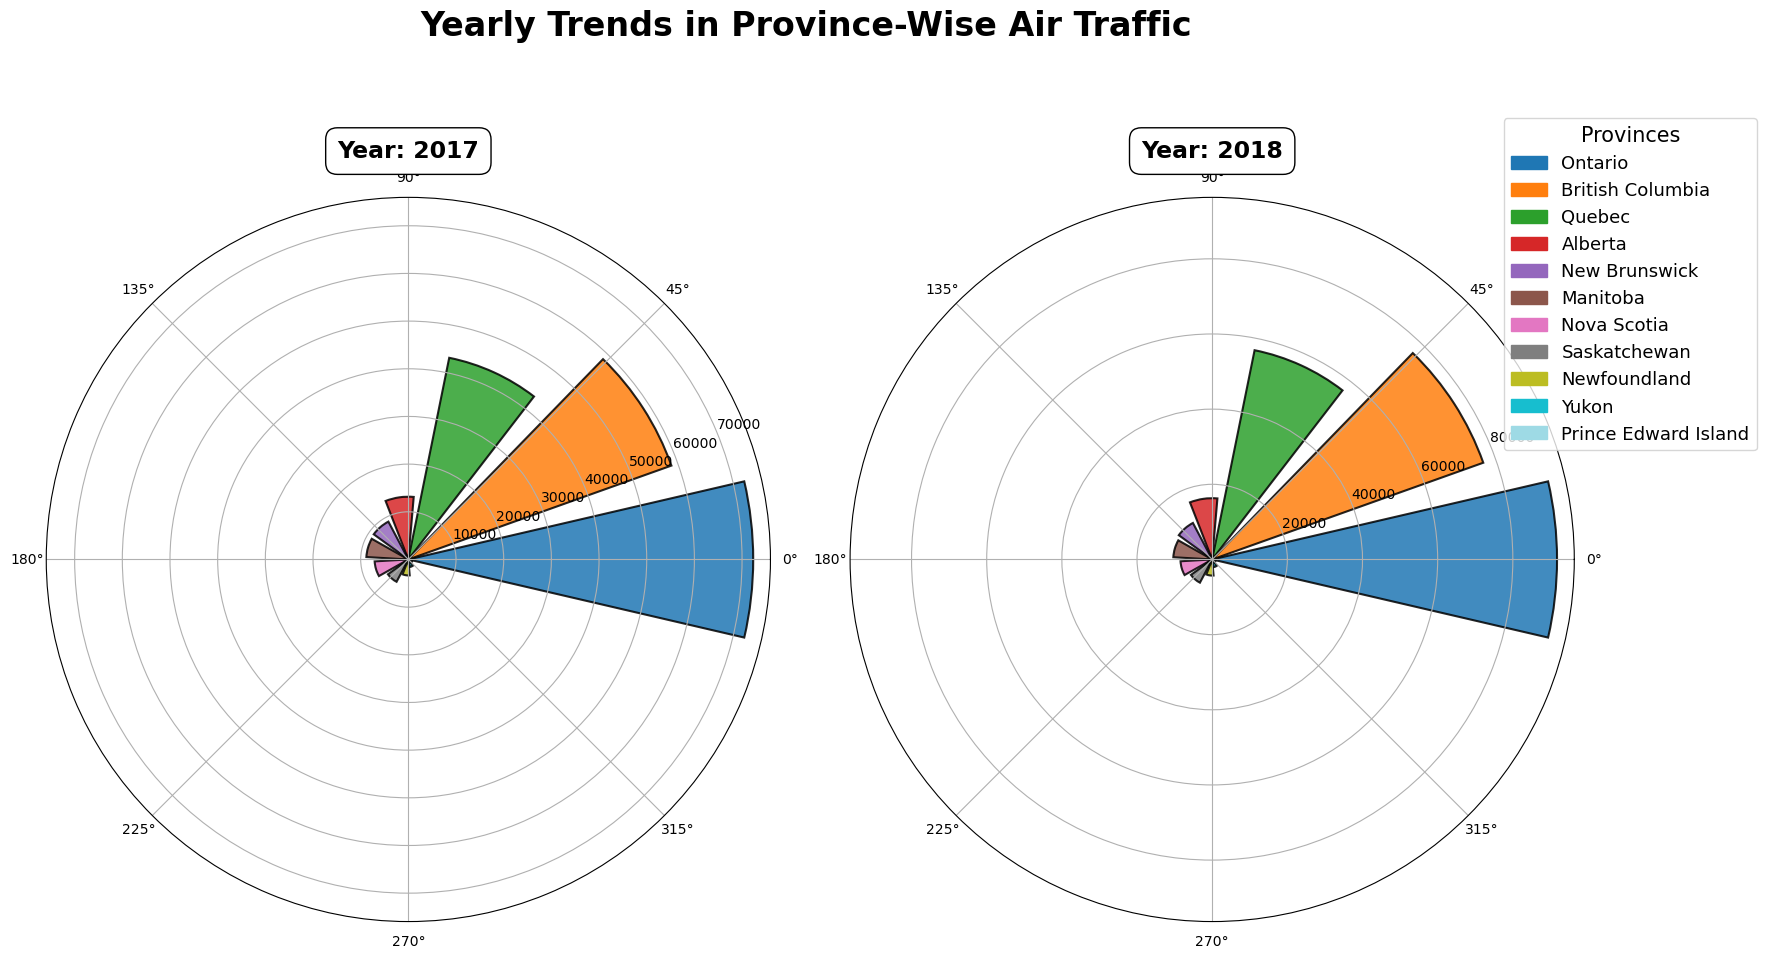

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming `merged_df` is the provided DataFrame
# Extract year from Flight Date
merged_df['Flight Year'] = pd.to_datetime(merged_df['Flight Date']).dt.year

# Group by Province and Flight Year, and calculate the sum of flights
yearly_province_flights = merged_df.groupby(['Flight Year', 'Province'])['Total Flights'].sum().reset_index()

# Calculate total flights per province (to sort provinces by decreasing total flights)
province_totals = yearly_province_flights.groupby('Province')['Total Flights'].sum().sort_values(ascending=False)
provinces = province_totals.index  # Provinces sorted by decreasing total count

# Get unique years
years = sorted(yearly_province_flights['Flight Year'].unique())

# Define consistent colors for provinces
colors = plt.cm.tab20(np.linspace(0, 1, len(provinces)))  # Generate colors for all provinces
province_colors = dict(zip(provinces, colors))  # Map province names to colors

# Create subplots for each year
fig, axes = plt.subplots(1, len(years), figsize=(16, 10), subplot_kw={'projection': 'polar'}, constrained_layout=True)

# Loop through each year and create a radial bar chart
for i, year in enumerate(years):
    ax = axes[i]
    
    # Filter data for the specific year
    year_data = yearly_province_flights[yearly_province_flights['Flight Year'] == year]
    year_data = year_data.set_index('Province').reindex(provinces).fillna(0)  # Align provinces with sorted order
    
    # Get flights and angles
    flights = year_data['Total Flights'].values
    angles = np.linspace(0, 2 * np.pi, len(provinces), endpoint=False)
    
    # Create radial bars
    bars = ax.bar(
        angles, 
        flights, 
        width=(2 * np.pi / len(provinces)) * 0.8,  # Adjust bar width
        color=[province_colors[province] for province in provinces],  # Use consistent colors
        alpha=0.85,  # Adjust opacity
        edgecolor='black',
        linewidth=1.5  # Thicker edges for visibility
    )
    
    # Set title with a box
    ax.set_title(
        f'Year: {year}', 
        va='bottom', 
        fontsize=17, 
        fontweight='bold', 
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
    )

# Add a color legend, ordered by decreasing total flights
handles = [plt.Rectangle((0, 0), 1, 1, color=province_colors[province]) for province in provinces]
fig.legend(handles, provinces, title='Provinces', bbox_to_anchor=(1.1, 0.95), fontsize=13, title_fontsize=15)

# Overall title
fig.suptitle('Yearly Trends in Province-Wise Air Traffic', fontsize=24, fontweight='bold', y=1.05)

plt.show()


+ So we can clearly see that the Provinces `Ontario`,`British Columbia` and `Quebec` have significantly higher flight traffic in years 2017,2018 as compared to the other provinces which is a strong indicator that they are very urbanized.

# Iteration 2:

# Goal: 
- `This iteration builds on the previous feedback and compares Enrollments in urban and rural provinces over the years.`

# Data:  
- Provinces were classified as urban or rural depending upon the air traffic analysis of previous iteration.
- Enrollment data was grouped by region type (‘Urban‘ or ‘Rural‘) and enrollment year.

# Visualization:
- A stacked area chart has been used to compare enrollments over time in urban and rural provinces.
- This chart clearly points out the dominance of urban provinces in enrollments.

# Knowledge:
- Urban provinces significantly outpace rural provinces in enrollments which is expected.
- This trend is consistent with better access to airports and economic opportunities in urban areas.
- Even though the urban provinces clearly have more enrollments that rural provinces, it might be that there are some provinces that have been classified as rural based on air traffic but they still have a huge number of enrollments.This is highly unlikely but never the less should be checked.

# Feedback Loop:
- The next iteration will analyze province-specific trends to check if there are any provinces that have been classified as rural but still contribute greatly to the number of enrollments.

# Code Explanation: Urban vs Rural Enrollments Over the Years

- `Define Urban and Rural Provinces`
Categorizes provinces into `urban` and `rural` groups based on predefined lists.

- `Add RegionType Column`
Adds a `RegionType` column to classify provinces as `Urban`, `Rural`, or `Unknown`.

- `Group and Aggregate Enrollments`
Groups data by `Province`, `RegionType`, and `Enrollment Year`, then counts enrollments.

- `Rename Enrollment Count Column`
Renames the enrollment count column to `Enrollments` for clarity.

- `Prepare Data for Stacked Area Chart`
Aggregates enrollments by `RegionType` and `Enrollment Year`, and pivots the data for plotting.

- `Create Stacked Area Chart`
Plots a stacked area chart with separate areas for urban and rural enrollments.

- `Customize Chart Appearance`
Adds title, axis labels, legend, gridlines, and adjusts chart layout for readability.

- ` Display the Chart`
Displays the final visualization showing urban vs rural enrollment trends over the years.


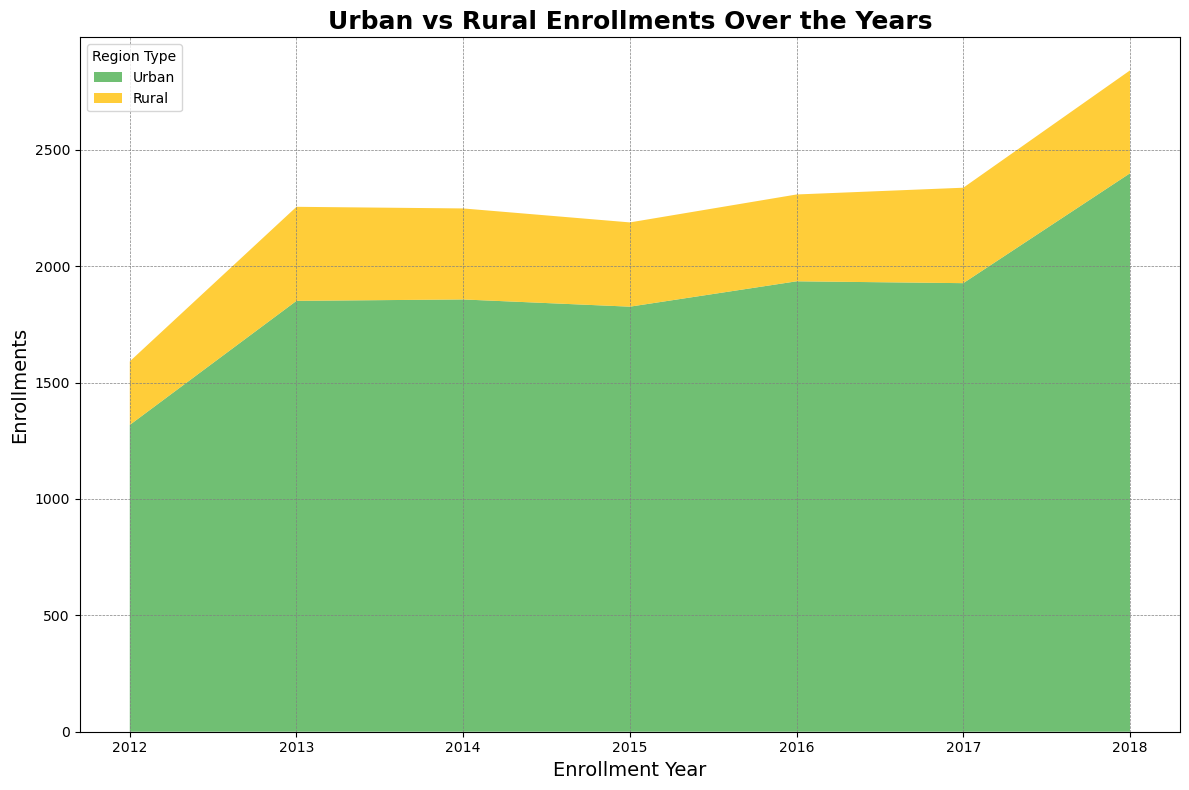

In [19]:
# Urban vs Rural enrollments over years
# Define urban and rural provinces
urban_provinces = ['Ontario', 'British Columbia', 'Quebec']
rural_provinces = ['Saskatchewan', 'Manitoba', 'Newfoundland', 'Nova Scotia', 'Yukon', 'New Brunswick','Prince Edward Island']
# Add a RegionType column to classify provinces
loyalty_history['RegionType'] = loyalty_history['Province'].apply(
    lambda x: 'Urban' if x in urban_provinces else ('Rural' if x in rural_provinces else 'Unknown')
)

region_year_enrollments = loyalty_history.groupby(['Province', 'RegionType', 'Enrollment Year'])['Loyalty Number'].count().reset_index()
region_year_enrollments.rename(columns={'Loyalty Number': 'Enrollments'}, inplace=True)

# Prepare data for stacked area chart
region_area_data = region_year_enrollments.groupby(['RegionType', 'Enrollment Year'])['Enrollments'].sum().reset_index()
region_area_pivot = region_area_data.pivot(index='Enrollment Year', columns='RegionType', values='Enrollments').fillna(0)

# Plot stacked area chart
plt.figure(figsize=(12, 8))
plt.stackplot(
    region_area_pivot.index, 
    region_area_pivot['Urban'], 
    region_area_pivot['Rural'], 
    labels=['Urban', 'Rural'], 
    colors=['#4CAF50', '#FFC107'], 
    alpha=0.8
)
plt.title('Urban vs Rural Enrollments Over the Years', fontsize=18, fontweight='bold')
plt.xlabel('Enrollment Year', fontsize=14)
plt.ylabel('Enrollments', fontsize=14)
plt.legend(loc='upper left', title='Region Type')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


+ So over here we have cateogorized the provinces into Urban and Rural based on earlier analysis and we find that the no of people that have enrolled into the loyalty program are significantly more in the Urban Provines as compared to the Rural which is something to be ecpected.
+ In fact we can clearly see that the no of enrollments from Urban Provinces has been consistently higher that Rural Provinces throughout the years.

# Iteration 3:

# Goal: 
- `This iteration focuses on province-wise enrollments to identify top contributors and their trends over time.`

# Data:  
- Enrollment data was grouped by province and year in order to make the visualization.

# Visualization:
- A line chart which is plotted to show enrollment trends for each province over the years.
- This chart also highlights the disproportionate dominance of Ontario, British Columbia, and Quebec,which have been classified as urban, in the number of enrollments into the loyalty program.

# Knowledge:
- Ontario, British Columbia, and Quebec show consistently high enrollments.
- It has been proved that there doesn’t exist any province that has been classified as rural that contributes greatly to the total number of enrollments.
- Contributions from these provinces may be concentrated in specific cities rather than being evenly distributed throughout the province.
- If that is the case it would be wrong to conclude that urban provinces contribute greatly to the number of enrollments as a whole.

# Feedback Loop:
- City-level contributions will be analyzed to identify key contributors and to check if all cities in urban provinces contribute proportionately to the number of enrollments.


# Code Explanation: Province-Wise Enrollments Over the Years

- `Group and Aggregate Enrollments`
Groups data by `Province` and `Enrollment Year` and counts the total enrollments.

- `Rename Enrollment Count Column`
Renames the enrollment count column to `Enrollments` for clarity.

- `Set Up Line Plot`
Uses a Seaborn line plot to visualize enrollments over years for each province.

- `Customize Plot Appearance`
Adds markers, adjusts line thickness, and uses a legend to differentiate provinces.

- `Add Titles and Labels`
Adds a chart title, axis labels, and a legend for better interpretability.

- `Configure Grid and Layout`
Adds gridlines and ensures a visually appealing layout with `tight_layout`.

- `Display the Chart`
Displays the final line plot showing trends in enrollments for each province over the years.


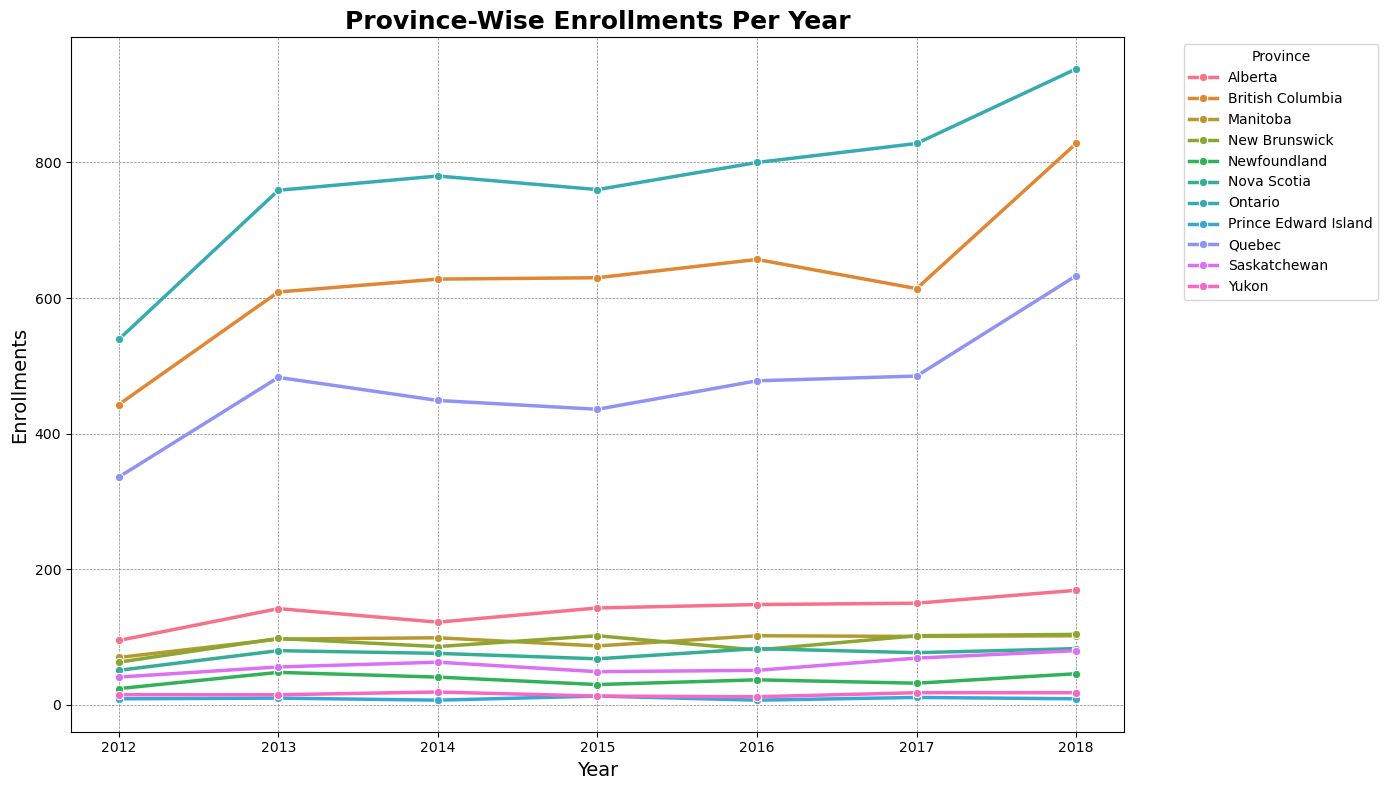

In [20]:

# Province-wise enrollments over years
province_year_enrollments = loyalty_history.groupby(['Province', 'Enrollment Year'])['Loyalty Number'].count().reset_index()
province_year_enrollments.rename(columns={'Loyalty Number': 'Enrollments'}, inplace=True)

# Plot province-wise enrollments
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=province_year_enrollments, 
    x='Enrollment Year', 
    y='Enrollments', 
    hue='Province', 
    marker='o', 
    linewidth=2.5
)
plt.title('Province-Wise Enrollments Per Year', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Enrollments', fontsize=14)
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


+ But if a particular Province has a very high fligh activity and enrollment rate it doesn't mean that the entire province has a high enrollment rate.
+ It could be that some particular cities in those provinces have exceptionally high enrollment rates thus driving up the total count of the province.
+ This is what we analyze in the next iteration.

# Iteration 4

# Goal: 
- `This iteration narrows the focus to cities so that any anomalies in the total number of contributions can be detected and to check where these cities with anomalous contributions lie.`

# Data:  
- Enrollment data was first grouped by city and province to detect cities with unusually high enrollment contributions.
- A heatmap was created to visualize yearly enrollment trends across cities, helping to pinpoint patterns and outliers.
- The top contributing cities were isolated, and their contributions were analyzed in relation to their provinces by calculating the percentage contribution of each city to its respective province.
- Coordinates for the top cities and approximate central points of their provinces were determined for mapping purposes.

# Visualization:
- The heatmap plot revealed that Toronto, Vancouver, and Montreal consistently contributed disproportionately high enrollments across all years.
- This chart clearly points out the dominance of urban provinces in enrollments.
- A map was created to show that:
    - The three provinces with the highest enrollments (Ontario, British Columbia, Quebec) marked with blue dots.
    - The top cities in these provinces (Toronto, Vancouver, Montreal) marked with red dots.
    - Province labels displaying total enrollments and the percentage contribution from their top cities.
    - City labels indicating their total enrollments.

# Knowledge:
- `Heatmap Analysis`:
    - The top three cities by enrollments across all years were identified as Toronto, Vancouver, and Montreal.
    - These cities dominate the enrollment counts, with much smaller contributions from other cities.
- `Mapping Insights`:
    - The top three provinces by enrollments are:
        - Ontario: 5,404 enrollments, with Toronto contributing 62.0% (3,351 enrollments).
        - British Columbia: 4,409 enrollments, with Vancouver contributing 58.6% (2,852 enrollments).
        - Quebec: 3,300 enrollments, with Montreal contributing 62.4% (2,059 enrollments).
    - These findings confirm that the majority of enrollments in these provinces are concentrated in their largest cities.
    - The contributions from these cities significantly overshadow the enrollments from other cities, demonstrating a highly concentrated pattern of enrollment activity.

# Feedback Loop:
- The findings emphasize the need to investigate and classify these cities in order to get a pattern that may validate and explain their role as key contributors in the number of enrollments.

# Code Explanation: City-Wise Enrollments Heatmap

- `Group and Aggregate Enrollments`
Groups data by `City` and `Enrollment Year`, then counts the total enrollments.

- `Rename Enrollment Count Column`
Renames the enrollment count column to `Enrollments` for clarity.

- `Pivot Data for Heatmap`
Pivots the data into a matrix format with `City` as rows and `Enrollment Year` as columns.

- `Fill Missing Values`
Fills missing values with `0` to ensure completeness in the heatmap.

- `Set Up Heatmap`
Uses a Seaborn heatmap to visualize the enrollments, with annotations and a color gradient (`YlGnBu`).

- `Customize Heatmap Appearance`
Adds gridlines, formats annotations as integers, and sets a visually appealing color scheme.

- `Add Titles and Labels`
Adds a chart title and axis labels for better interpretability.

- `Display the Chart`
Displays the heatmap showing city-wise enrollment trends across years.


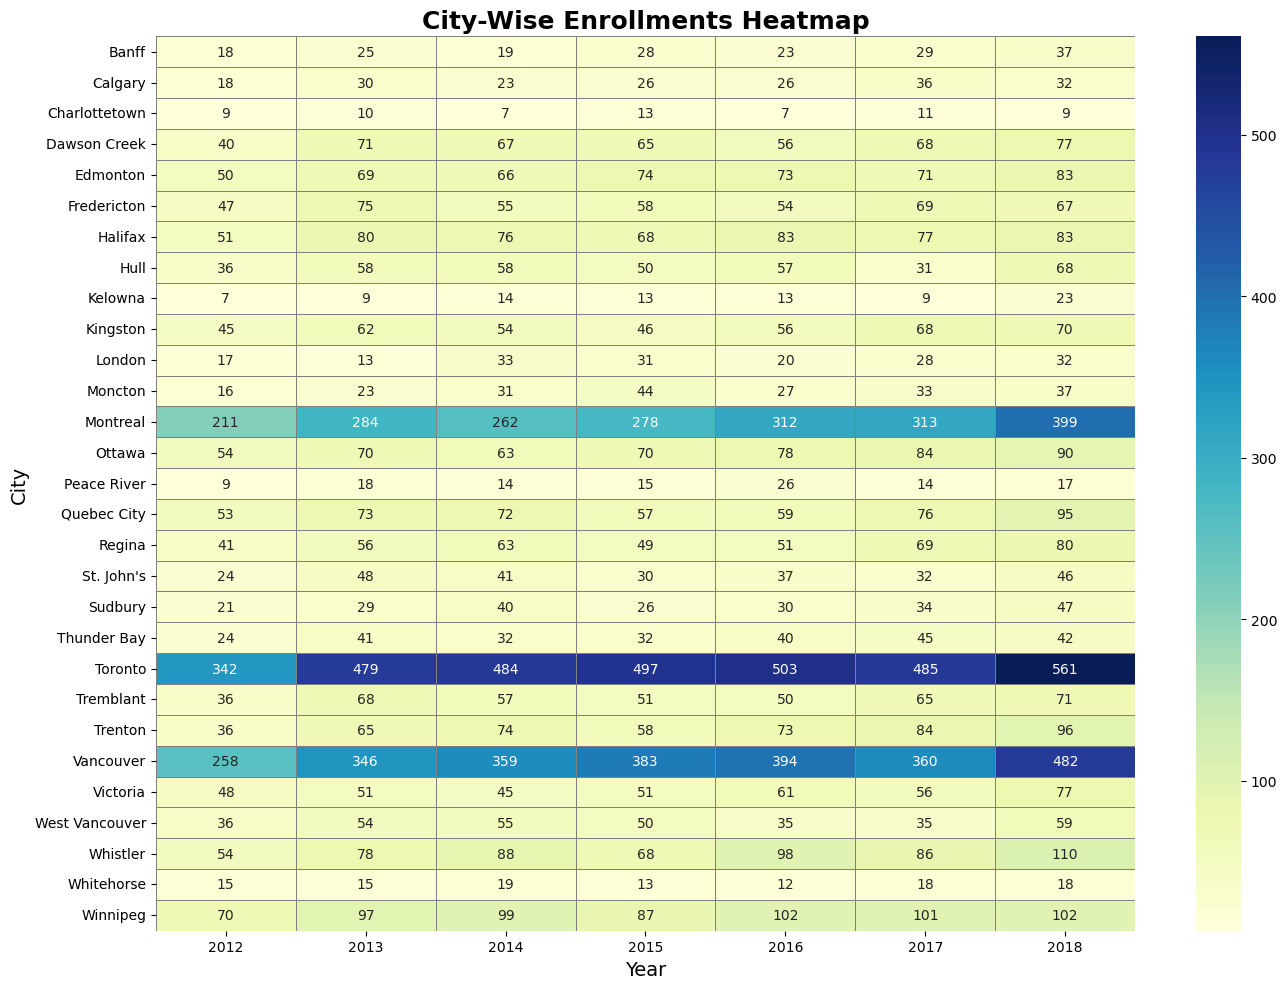

In [21]:
# City-wise enrollments heatmap
city_year_enrollments = loyalty_history.groupby(['City', 'Enrollment Year'])['Loyalty Number'].count().reset_index()
city_year_enrollments.rename(columns={'Loyalty Number': 'Enrollments'}, inplace=True)
city_year_pivot = city_year_enrollments.pivot(index='City', columns='Enrollment Year', values='Enrollments').fillna(0)

plt.figure(figsize=(14, 10))
sns.heatmap(
    city_year_pivot, 
    annot=True, 
    fmt='.0f', 
    cmap='YlGnBu', 
    linewidths=.5, 
    linecolor='gray'
)
plt.title('City-Wise Enrollments Heatmap', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.tight_layout()
plt.show()


+ We can clearly see that 3 particular cities : `Montreal`,`Toronto` and `Vancouver` stand out in this map as having exceptionally high enrollment counts over the years.
+ The next plot will place these cities into their respective provinces.

# Code Explanation: Top Provinces and Cities by Enrollments in Canada (Map Visualization)

`1. Load and Preprocess Data`
- Reads the loyalty history dataset and extracts the enrollment year from the `Enrollment Date`.
- Aggregates enrollments by province and identifies the top 3 provinces with the highest enrollments.

`2. Identify Top City for Each Top Province`
- Groups data by city within each top province to calculate city enrollments.
- Computes the percentage contribution of each top city to its province's total enrollments.

`3. Create DataFrame for Top Cities`
- Stores the top city name, province, enrollments, and contribution percentage in a new DataFrame.

`4. Define Geographic Coordinates`
- Provides approximate coordinates for the top cities and province centers for plotting.

`5. Set Up Cartopy Map`
- Initializes a `LambertConformal` projection for a visually suitable map of Canada.
- Adds geographic features like land, coastlines, borders, and state boundaries.

`6. Mark Top Provinces on the Map`
- Plots a blue dot at each top province's center and adds a labeled blue box with:
  - Province name.
  - Total enrollments.
  - Top city and its contribution percentage.

`7. Highlight Top Cities`
- Marks each top city with a red dot and adds labels showing the city name and enrollments.

`8. Configure Map Extent and Appearance`
- Focuses the map on mainland Canada and adjusts the extent for better visualization.

`9. Add Title and Display`
- Adds a descriptive title to summarize the visualization and displays the map.

### Final Output
- A map highlighting the top provinces and their top cities in terms of enrollments, along with the contribution percentages of the top cities.


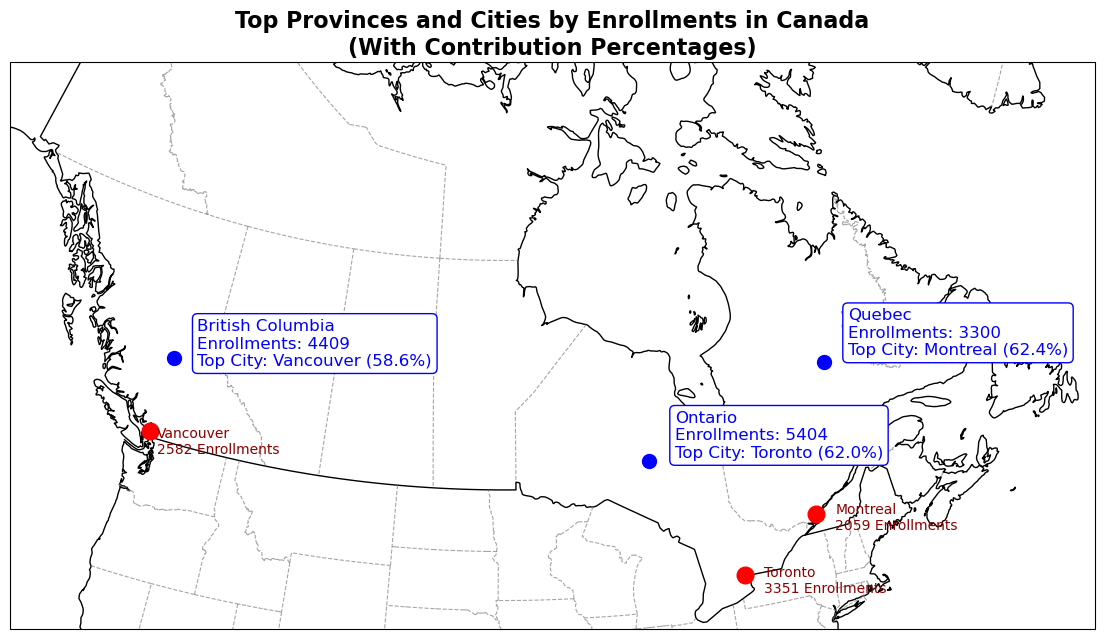

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import natural_earth, Reader

# Load the loyalty history dataset
loyalty_history_path = '/Users/rishipatel/Desktop/Sem-5/DV/Ass-3/Updated_Customer_Loyalty_History.csv'
loyalty_history = pd.read_csv(loyalty_history_path)

# Extract year from enrollment date
loyalty_history['Enrollment Year'] = pd.to_datetime(loyalty_history['Enrollment Date']).dt.year

# Aggregate enrollments by province
province_totals = loyalty_history.groupby('Province')['Loyalty Number'].count().reset_index()
province_totals.rename(columns={'Loyalty Number': 'Total Enrollments'}, inplace=True)

# Identify the top 3 provinces
top_provinces = province_totals.nlargest(3, 'Total Enrollments')

# Find the top city in each of the top 3 provinces and calculate percentage contribution
top_cities = []
for province in top_provinces['Province']:
    city_totals = loyalty_history[loyalty_history['Province'] == province].groupby('City')['Loyalty Number'].count().reset_index()
    city_totals.rename(columns={'Loyalty Number': 'City Enrollments'}, inplace=True)
    top_city = city_totals.nlargest(1, 'City Enrollments')
    city_name = top_city['City'].values[0]
    city_enrollments = top_city['City Enrollments'].values[0]
    province_enrollments = top_provinces[top_provinces['Province'] == province]['Total Enrollments'].values[0]
    percentage = (city_enrollments / province_enrollments) * 100
    top_cities.append((city_name, province, city_enrollments, percentage))

# Create a DataFrame for the top cities
top_cities_df = pd.DataFrame(top_cities, columns=['City', 'Province', 'City Enrollments', 'Percentage Contribution'])

# City coordinates (update as needed)
city_coordinates = {
    'Toronto': [43.65107, -79.347015],
    'Vancouver': [49.282729, -123.120738],
    'Montreal': [45.901689, -73.567256],
    # Add coordinates for other cities if needed
}

# Province centers (approximate central coordinates)
province_centers = {
    'Ontario': [50, -85],  # Approximate center for Ontario
    'British Columbia': [53, -123],  # Approximate center for British Columbia
    'Quebec': [53, -70],  # Approximate center for Quebec
}

# Plotting the enhanced map using Cartopy
fig, ax = plt.subplots(figsize=(14, 10), subplot_kw={'projection': ccrs.LambertConformal()})

# Add geographic features
ax.add_feature(cfeature.LAND, facecolor='white')  # Set land to white
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linewidth=1, edgecolor='black')

# Add state boundaries
state_boundaries = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none',
    edgecolor='gray'
)
ax.add_feature(state_boundaries, linewidth=0.8, linestyle='--', alpha=0.7)

# Mark top provinces with a dot and add blue box labels
for province, (lat, lon) in province_centers.items():
    if province in top_provinces['Province'].values:
        # Plot province center dot
        ax.plot(lon, lat, marker='o', color='blue', markersize=10, transform=ccrs.PlateCarree())
        
        # Add blue box label
        province_data = top_provinces[top_provinces['Province'] == province]
        city_data = top_cities_df[top_cities_df['Province'] == province].iloc[0]
        ax.text(
            lon + 2, lat,  # Offset label slightly to the right of the province dot
            f"{province}\nEnrollments: {province_data['Total Enrollments'].values[0]}\n"
            f"Top City: {city_data['City']} ({city_data['Percentage Contribution']:.1f}%)",
            transform=ccrs.PlateCarree(), fontsize=12, color='blue',
            bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3')
        )

# Plot city markers for top cities
for _, city in top_cities_df.iterrows():
    city_name = city['City']
    lat, lon = city_coordinates[city_name]
    ax.plot(lon, lat, marker='o', color='red', markersize=12, transform=ccrs.PlateCarree())
    
    # Add label for each city
    ax.text(
        lon + 1, lat - 1,  # Offset label slightly to avoid overlap
        f"{city_name}\n{city['City Enrollments']} Enrollments",
        transform=ccrs.Geodetic(), fontsize=10, color='darkred'
    )

# Adjust map extent to focus exclusively on mainland Canada
ax.set_extent([-130, -55, 42, 65], crs=ccrs.PlateCarree())

# Add title
ax.set_title("Top Provinces and Cities by Enrollments in Canada\n(With Contribution Percentages)", fontsize=16, weight='bold')

# Show the map
plt.show()


+ From this map ot can be clearly seen that the Provinces with the highest number of Enrollments have specific cities that contribute highly to the no of enrollments.
+ The Province as a whole without that city doesn't contrubute much.

# Iteration 5:

# Goal: 
- `The findings from the previous iteration emphasized the need to classify the top contributing cities to better understand their role in the number of enrollments. This classification aims to determine whether these cities share common characteristics that explain their disproportionate contribution, validating their significance as key contributors.Ideally we would like to classify the cities as metro and non metro and generally say that metro cities are likely to contribute to the loyalty program in higher numbers.`

# Data:  
- Air traffic data from earlier iterations was reused and this time grouped by city in order to help classify the cities.
- The data for the top 10 cities across Canada was compiled, and cities with disproportionately higher air traffic counts were classified as metro regions.

# Visualization:
- The air traffic trends for the top 10 cities were visualized using radial bar charts for two different years.
- These charts highlight the disproportionate air traffic handled by Toronto, Vancouver, and Montreal compared to other cities.

# Knowledge:
- `Metro Classification:`
    - Toronto, Vancouver, and Montreal, identified as the top contributors in Iteration 4, were classified as metro cities based on their high air traffic volumes.
    - This classification aligns with the 2021 Census of Canada [2], where these cities are officially categorized as metropolitan areas.
- `Contribution to Enrollments:`
    - These metro cities, which exhibit high air traffic, also contribute disproportionately to the total number of enrollments.
    - The alignment of air traffic and enrollment contributions and the successful categorization of cities as metro cities based on air traffic data reinforces the hypothesis that metro cities are significant drivers of enrollments.
- `Validation:`
    - The findings validate that metro cities, characterized by higher economic activity, infrastructure, and connectivity, play a dominant role in enrollment patterns.
    - This provides a cohesive explanation for their repeated identification as key contributors in previous iterations.

    
# Code Explanation: Yearly Trends in City-Wise Air Traffic (Top 10 Cities)

- `Extract Year from Flight Date`
Converts the `Flight Date` column to a datetime format and extracts the year into a new column `Flight Year`.

- `Aggregate Flights by City and Year`
Groups data by `Flight Year` and `City` to calculate the total number of flights for each city per year.

- `Identify Top 10 Cities`
Calculates the total flights for each city across all years and selects the top 10 cities with the highest totals.

- `Filter Data for Top Cities`
Filters the dataset to include only the top 10 cities for focused visualization.

- `Define City Colors`
Assigns consistent, distinct colors to each city using the `Set1` colormap.

- `Create Subplots for Radial Bar Charts`
Initializes polar subplots, one for each year, to visualize city-wise flight trends.

- `Plot Radial Bars`
    - For each year:
        - Aligns cities in a consistent order.
        - Plots radial bars representing the total flights for each city using unique colors.
    


- `Add Subplot Titles`
Adds a title for each subplot indicating the respective year, formatted with a styled box.

- `Add Color Legend`
Creates a color-coded legend identifying cities by their assigned colors.

- `Add Overall Title and Display`
Adds an overarching title summarizing the visualization and displays the final figure showing yearly trends in air traffic for the top 10 cities.


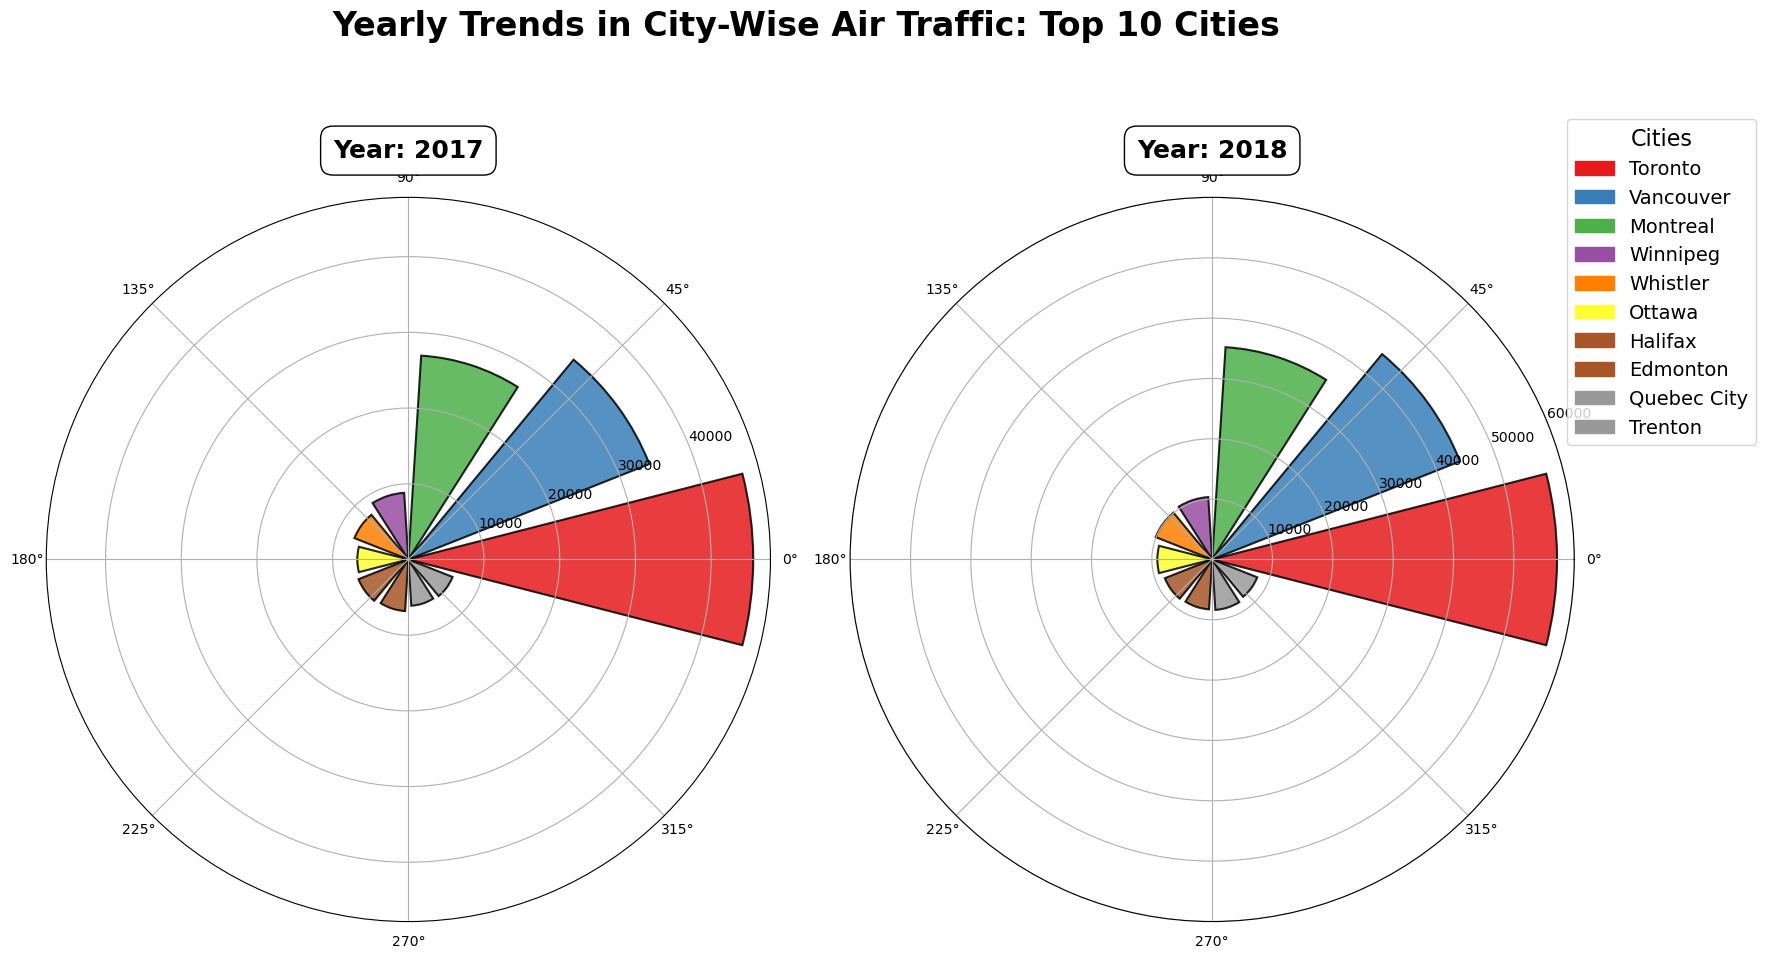

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming `merged_df` is the provided DataFrame
# Extract year from Flight Date
merged_df['Flight Year'] = pd.to_datetime(merged_df['Flight Date']).dt.year

# Group by City and Flight Year, and calculate the sum of flights
yearly_city_flights = merged_df.groupby(['Flight Year', 'City'])['Total Flights'].sum().reset_index()

# Calculate total flights per city (to select top 10 cities)
city_totals = yearly_city_flights.groupby('City')['Total Flights'].sum().sort_values(ascending=False)
top_cities = city_totals.head(10).index  # Get top 10 cities by total flights

# Filter the data to include only the top 10 cities
yearly_city_flights = yearly_city_flights[yearly_city_flights['City'].isin(top_cities)]

# Get unique years and ensure consistent city order
years = sorted(yearly_city_flights['Flight Year'].unique())
cities = city_totals.loc[top_cities].index  # Cities sorted by total flights

# Define consistent colors for cities using a discrete colormap (Set1)
colors = plt.cm.Set1(np.linspace(0, 1, len(cities)))  # Using the 'Set1' colormap for discrete categories
city_colors = dict(zip(cities, colors))  # Map city names to colors

# Create subplots for each year
fig, axes = plt.subplots(1, len(years), figsize=(16, 10), subplot_kw={'projection': 'polar'}, constrained_layout=True)

# Loop through each year and create a radial bar chart
for i, year in enumerate(years):
    ax = axes[i]
    
    # Filter data for the specific year
    year_data = yearly_city_flights[yearly_city_flights['Flight Year'] == year]
    year_data = year_data.set_index('City').reindex(cities).fillna(0)  # Align cities with consistent order
    
    # Get flights and angles
    flights = year_data['Total Flights'].values
    angles = np.linspace(0, 2 * np.pi, len(cities), endpoint=False)
    
    # Create radial bars
    bars = ax.bar(
        angles, 
        flights, 
        width=(2 * np.pi / len(cities)) * 0.8,  # Adjust bar width
        color=[city_colors[city] for city in cities],  # Use consistent colors
        alpha=0.85,  # Adjust opacity
        edgecolor='black',
        linewidth=1.5  # Thicker edges for visibility
    )
    
    # Set title with a box
    ax.set_title(
        f'Year: {year}', 
        va='bottom', 
        fontsize=18, 
        fontweight='bold', 
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
    )

# Add a color legend
handles = [plt.Rectangle((0, 0), 1, 1, color=city_colors[city]) for city in cities]
fig.legend(handles, cities, title='Cities', bbox_to_anchor=(1.1, 0.95), fontsize=14, title_fontsize=16)

# Overall title
fig.suptitle('Yearly Trends in City-Wise Air Traffic: Top 10 Cities', 
             fontsize=24, fontweight='bold', y=1.05)

plt.show()


+ By looking at the air traffic over the years we have data on we can clearly see that the cities `Toronto`,`Vancouver` and `Montreal` have a very high air traffic as compared to other cities in Canda indicating that they are metro cities which they actually are.

# Metro vs Non-Metro Enrollments Analysis

- `Define metro and non-metro cities`
    - Created lists to classify cities as either metro or non-metro.

- `Add a City Tier column`
    - Added a new column `City Tier` to categorize cities into 'Metro', 'Non-Metro', or 'Unknown'.

- `Group data by City and City Tier`
    - Grouped the data to calculate the number of enrollments for each city and tier.

- `Rename column for clarity`
    - Renamed the column from 'Loyalty Number' to 'Enrollments' for better understanding.

- `Plot scatter plot for enrollments`
    - Created a scatter plot to visualize enrollments across cities categorized by metro and non-metro tiers.


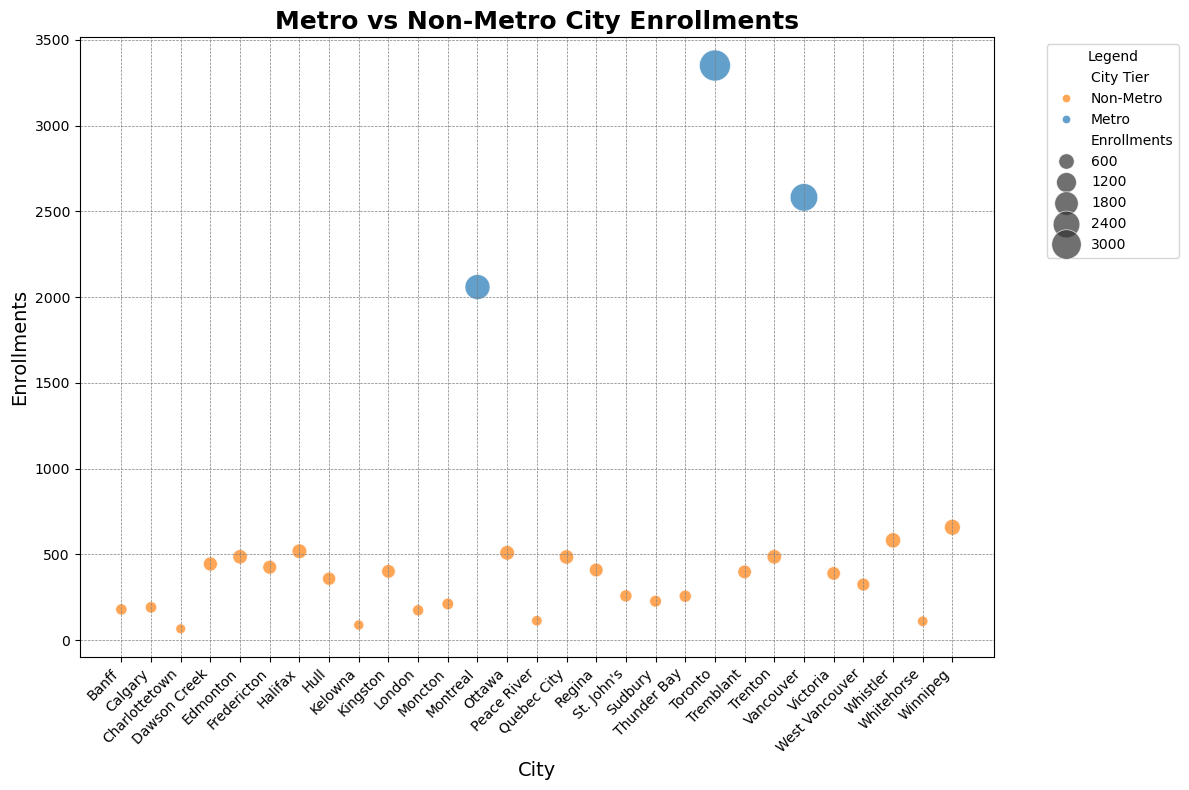

In [ ]:
# Metro vs Non-Metro enrollments
# Define metro and non-metro cities
metro_cities = [
    'Toronto', 'Vancouver', 'Montreal'
    
]

non_metro_cities = [
    'Hull', 'Whitehorse', 'Trenton', 'Dawson Creek', 'Fredericton', 
    'Tremblant', 'Thunder Bay', 'Whistler', 'Peace River', 
    'Sudbury', 'West Vancouver', 'Regina', 'Kelowna', 
    "St. John's", 'Kingston', 'Banff', 'Moncton', 'Charlottetown','Quebec City', 'Ottawa', 'Calgary', 'Winnipeg', 
    'Halifax', 'London', 'Victoria','Edmonton'
]

# Add a City Tier column
loyalty_history['City Tier'] = loyalty_history['City'].apply(
    lambda x: 'Metro' if x.strip().title() in [city.title() for city in metro_cities] else 
              ('Non-Metro' if x.strip().title() in [city.title() for city in non_metro_cities] else 'Unknown')
)
city_cluster_data = loyalty_history.groupby(['City', 'City Tier'])['Loyalty Number'].count().reset_index()
city_cluster_data.rename(columns={'Loyalty Number': 'Enrollments'}, inplace=True)

# Plot scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=city_cluster_data, 
    x='City', 
    y='Enrollments', 
    hue='City Tier', 
    size='Enrollments', 
    sizes=(50, 500), 
    alpha=0.7, 
    palette={'Metro': '#1f77b4', 'Non-Metro': '#ff7f0e'}
)
plt.title('Metro vs Non-Metro City Enrollments', fontsize=18, fontweight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Enrollments', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


+ So what we infer from all of this is that metro cities contribute highly to the number of enrollments into the loyalty Program.